### Participants:
- Carlos Paredes
- Stefano Sossi
- Vincent Valenzuela

### **Análisis de criptomonedas para predecir el precio y como se ve afectado en fechas estratégicas**.

In [1]:
import numpy as np
import pandas as pd
import os,math
import matplotlib.pyplot as plt
import re
from dateutil.relativedelta import relativedelta 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Data**. 
Primero leemos los datos y los preparamos para el proyecto.
Para este proyecto utilizaremos los datos históricos del precio de 100 criptomonedas en el mercado.

In [2]:
#The data
corpus_root = '../data/coins/'

coins = list()
coins_names = list()
for coin_file in os.listdir(corpus_root):
   print(coin_file)
   coins_names.append(coin_file.split('.')[0])
   coins.append(pd.read_csv(os.path.join(corpus_root,coin_file)))


Aave.csv
algorand.csv
Ankr.csv
Arweave.csv
avalanche.csv
Axie Infinity.csv
Basic Attention Token.csv
binance coin.csv
bitcoin cash.csv
Bitcoin SV.csv
bitcoin.csv
cardano.csv
Celo.csv
chainlink.csv
Chiliz.csv
Compound.csv
cosmos.csv
crypto.com coin.csv
Curve DAO Token.csv
dai.csv
Dash.csv
decentraland.csv
Decred.csv
dogecoin.csv
elrond.csv
Enjin Coin.csv
EOS.csv
ethereum classic.csv
ethereum.csv
fantom.csv
filecoin.csv
ftx token.csv
Hedera.csv
Horizen.csv
ICON.csv
IOTA.csv
IoTeX.csv
Kadena.csv
Kusama.csv
litecoin.csv
Loopring.csv
Maker.csv
Monero.csv
near protocol.csv
NEM.csv
Neo.csv
OMG Network.csv
PancakeSwap.csv
polkadot.csv
polygon.csv
Qtum.csv
Quant.csv
SHIBA INU.csv
Siacoin.csv
solana.csv
stellar.csv
terra.csv
tether.csv
tezos.csv
the graph.csv
The Sandbox.csv
Theta Fuel.csv
theta.csv
THORChain.csv
tron.csv
TrueUSD.csv
uniswap.csv
usd coin.csv
vechain.csv
Voyager Token.csv
Waves.csv
WAX.csv
wrapped bitcoin.csv
xrp.csv
Zcash.csv


In [6]:
coins[0].head(100)

,Date,Open,High,Low,Close,Volume,Currency
0,2020-10-05,0.528101,0.528101,0.528101,0.528101,879.0,USD
1,2020-10-06,0.528101,0.528101,0.528101,0.528101,879.0,USD
2,2020-10-07,0.528101,0.528101,0.528101,0.528101,879.0,USD
3,2020-10-08,0.528101,0.528101,0.528101,0.528101,879.0,USD
4,2020-10-10,46.818146,51.405655,46.703327,49.133717,1074627.0,USD
...,...,...,...,...,...,...,...
95,2021-06-15,319.400604,326.900909,308.366943,319.757294,352145487.0,USD
96,2021-06-16,311.928223,313.738556,287.531158,290.268494,192278220.0,USD
97,2021-06-17,290.296387,305.388519,285.459717,292.914612,146151226.0,USD
98,2021-06-18,293.533905,293.784607,253.611221,264.352081,229941835.0,USD


In [7]:
print(coins_names)

['Aave', 'algorand', 'Ankr', 'Arweave', 'avalanche', 'Axie Infinity', 'Basic Attention Token', 'binance coin', 'bitcoin cash', 'Bitcoin SV', 'bitcoin', 'cardano', 'Celo', 'chainlink', 'Chiliz', 'Compound', 'cosmos', 'crypto', 'Curve DAO Token', 'dai', 'Dash', 'decentraland', 'Decred', 'dogecoin', 'elrond', 'Enjin Coin', 'EOS', 'ethereum classic', 'ethereum', 'fantom', 'filecoin', 'ftx token', 'Hedera', 'Horizen', 'ICON', 'IOTA', 'IoTeX', 'Kadena', 'Kusama', 'litecoin', 'Loopring', 'Maker', 'Monero', 'near protocol', 'NEM', 'Neo', 'OMG Network', 'PancakeSwap', 'polkadot', 'polygon', 'Qtum', 'Quant', 'SHIBA INU', 'Siacoin', 'solana', 'stellar', 'terra', 'tether', 'tezos', 'the graph', 'The Sandbox', 'Theta Fuel', 'theta', 'THORChain', 'tron', 'TrueUSD', 'uniswap', 'usd coin', 'vechain', 'Voyager Token', 'Waves', 'WAX', 'wrapped bitcoin', 'xrp', 'Zcash']


Por motivos de facilitar el análisis, agregamos una columna con el nombre de la criptomoneda.

In [8]:
for index,element in enumerate(coins, start=0):
    element['Name'] = coins_names[index]
coins[1].head(100)

,Date,Open,High,Low,Close,Volume,Currency,Name
0,2019-07-25,0.5983,0.6148,0.5860,0.6102,4753925,USD,algorand
1,2019-07-26,0.6103,0.7111,0.5940,0.6503,8947342,USD,algorand
2,2019-07-27,0.6501,0.6673,0.5728,0.5788,9094853,USD,algorand
3,2019-07-28,0.5788,0.5992,0.5584,0.5759,11048324,USD,algorand
4,2019-07-29,0.5770,0.5934,0.5546,0.5710,11034328,USD,algorand
...,...,...,...,...,...,...,...,...
95,2019-10-28,0.2177,0.2397,0.2177,0.2303,2272452,USD,algorand
96,2019-10-29,0.2304,0.2347,0.2218,0.2263,1629597,USD,algorand
97,2019-10-30,0.2263,0.2266,0.2074,0.2109,1533512,USD,algorand
98,2019-10-31,0.2110,0.2230,0.2076,0.2224,1547526,USD,algorand


**TOP 10**.

Utilizaremos el top 10 de las criptomonedas más importantes.

In [3]:
leaderboard = pd.read_csv('../data/leaderboard/Current Crypto leaderboard.csv')
leaderboard = leaderboard.head(10)
leaderboard

,Rank,Name,Symbol,Price (USD),Market Cap,Vol (24H),Total Vol,Chg (24H),Chg (7D),Dataset Availability
0,1,Bitcoin,BTC,58543.000000,$1.12T,$37.89B,29.37%,2.47%,3.16%,True
1,2,Ethereum,ETH,4682.280000,$559.27B,$26.12B,20.24%,8.01%,9.91%,True
2,3,Binance Coin,BNB,628.820000,$105.79B,$2.65B,2.05%,1.62%,6.52%,True
3,4,Tether,USDT,1.000900,$73.27B,$85.51B,66.27%,0.01%,-0.05%,True
4,5,Solana,SOL,215.530000,$66.17B,$2.59B,2.00%,4.18%,0.34%,True
5,6,Cardano,ADA,1.609100,$54.01B,$1.98B,1.54%,2.57%,-9.35%,True
6,7,XRP,XRP,1.022450,$48.58B,$3.13B,2.43%,4.73%,-2.13%,True
7,8,USD Coin,USDC,0.999300,$38.64B,$5.04B,3.90%,-0.02%,-0.13%,True
8,9,Polkadot,DOT,38.412000,$38.32B,$1.46B,1.13%,6.82%,-4.31%,True
9,10,Dogecoin,DOGE,0.221496,$29.57B,$2.00B,1.55%,2.96%,-2.93%,True


In [26]:
##Definimos una función para convertir el Market Cap a un valor numérico fácil de graficar.
def to_float(x):
        if type(x) == float or type(x) == int:
            return x
        if 'K' in x:
            if len(x) > 1:
                return float(x.replace('K', '')) * 1000
            return 1000.0
        if 'M' in x:
            if len(x) > 1:
                return float(x.replace('M', '')) * 1000000
            return 1000000.0
        if 'B' in x:
            return float(x.replace('B', '')) * 1000000000
        if 'T' in x:
            return float(x.replace('T', '')) * 1000000000000
        return 0.0


C:\Users\tenos\AppData\Local\Temp/ipykernel_7332/2031365784.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  leaderboard['Market Cap'] = leaderboard['Market Cap'].str.replace('$', '')


Text(0.5, 1.0, 'Leader Board Barchart')

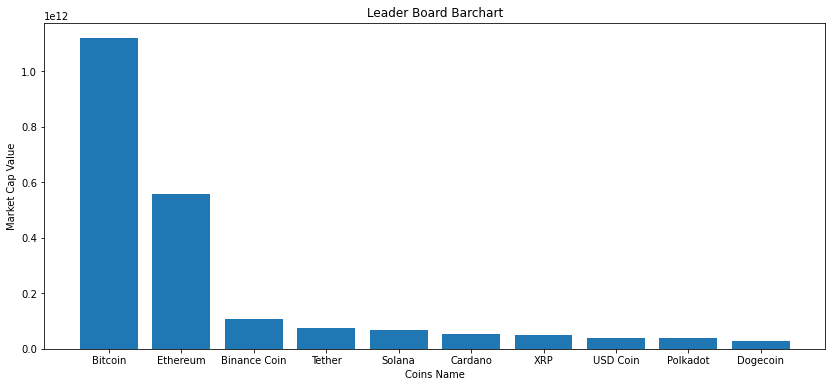

In [5]:
# leaderboard['Market Cap'] = leaderboard['Market Cap'].astype(str)
leaderboard['Market Cap'] = leaderboard['Market Cap'].str.replace('$', '')
leaderboard['Market Cap'] = leaderboard['Market Cap'].apply(to_float)
plt.figure(figsize=(14,6))
plt.bar(leaderboard.Name.head(10),leaderboard['Market Cap'].head(10))
plt.xlabel('Coins Name')
plt.ylabel('Market Cap Value')
plt.title('Leader Board Barchart')

**Observaciones**

En la gráfica podemos observar la diferencia de volumen del valor en el mercado de Bitcoin y Ethereum a diferencia con las demás criptomonedas. 
Remarcando la importancia que tienen Bitcoin y Ethereum en el mercado.


Obtenemos los datos de la criptomonedas según el top 10 obtenido previamente.

In [9]:

top_10 = list()
index_list = list()
for index,element in enumerate(coins_names, start=0):
    if leaderboard['Name'].str.contains(element,flags=re.IGNORECASE).any():
        i = leaderboard[leaderboard['Name'].apply(lambda x: x.upper() == element.upper())]
        top_10.append(coins[index])
        index_list.append(int(i['Rank']))


top_10 = [x for _, x in sorted(zip(index_list, top_10))]

top_10[1]


,Date,Open,High,Low,Close,Volume,Currency,Name
0,2016-03-10,11.20,11.85,11.07,11.75,4,USD,ethereum
1,2016-03-11,11.75,11.95,11.75,11.95,179,USD,ethereum
2,2016-03-12,11.95,13.45,11.95,12.92,833,USD,ethereum
3,2016-03-13,12.92,15.07,12.92,15.07,1295,USD,ethereum
4,2016-03-14,15.07,15.07,11.40,12.50,92183,USD,ethereum
...,...,...,...,...,...,...,...,...
2087,2021-11-26,4520.30,4548.10,3917.43,4034.53,1004251,USD,ethereum
2088,2021-11-27,4037.06,4183.02,4029.06,4094.80,370731,USD,ethereum
2089,2021-11-28,4095.16,4297.63,3980.24,4296.98,487532,USD,ethereum
2090,2021-11-29,4296.98,4456.82,4280.18,4443.22,532658,USD,ethereum


In [10]:
# Description of the bitcoin data
top_10[0].describe()

,Open,High,Low,Close,Volume
count,4154.000000,4154.000000,4154.000000,4154.000000,4.154000e+03
mean,6563.091406,6755.905272,6351.518103,6577.140323,2.874855e+05
std,13044.853208,13424.220395,12622.709705,13069.279922,9.723168e+05
min,0.000000,0.100000,0.000000,0.100000,0.000000e+00
25%,103.925000,107.850000,98.900000,104.000000,2.785825e+04
50%,609.200000,618.550000,600.100000,609.350000,6.517900e+04
75%,7509.800000,7697.950000,7331.075000,7510.825000,1.646830e+05
max,67528.700000,68990.600000,66334.900000,67527.900000,2.025590e+07


In [11]:
# Reviewing the max and min date
for coin in top_10:
    print(coin.iloc[0].Name,'[',coin.Date.min(),' - ',coin.Date.max(),']')

bitcoin [ 2010-07-18  -  2021-11-30 ]
ethereum [ 2016-03-10  -  2021-11-30 ]
binance coin [ 2017-11-09  -  2021-11-30 ]
tether [ 2017-04-14  -  2021-11-30 ]
solana [ 2020-06-04  -  2021-08-28 ]
cardano [ 2017-12-31  -  2021-11-30 ]
xrp [ 2015-01-22  -  2021-11-30 ]
usd coin [ 2018-12-06  -  2021-11-30 ]
polkadot [ 2020-08-21  -  2021-11-30 ]
dogecoin [ 2017-06-03  -  2021-11-30 ]


Verifying in the list of `DataFrames` that there is no `missing data`.

In [12]:
nullValues = []
for coin in coins:
    nullValues.append(coin.isnull().sum().sum())
if np.sum(nullValues)==0:
    print('There is no missing data for all the DataFrames')
else:
    print('There is missing data in DataFrames')

There is no missing data for all the DataFrames


Using Pandas `to_datetime` method to parse the `Column Date` into a `datetime` object.

In [27]:
filtered_top10 = list()
semester = relativedelta(months=6)
for index,element in enumerate(top_10, start=0):
    element['Date'] = pd.to_datetime(element['Date'])
    filtered_df = element.loc[(element['Date'] >= element['Date'].max()-semester)
                     & (element['Date'] < element['Date'].max())]
    filtered_top10.append(filtered_df)
    
filter0 = filtered_top10[6][filtered_top10[6]['Volume'] == 0] 
filter0




,Date,Open,High,Low,Close,Volume,Currency,Name


Reviewing the type for each column of the DataFrame and verified that date was converted to `datetime` object

In [14]:
filtered_top10[0].dtypes

Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
Name                object
dtype: object

In [15]:
print("Total records for the topten coins:\n")
[print(coin.iloc[0].Name,": ",coin.shape) for coin in filtered_top10] 

Total records for the topten coins:

bitcoin :  (184, 8)
ethereum :  (184, 8)
binance coin :  (184, 8)
tether :  (184, 8)
solana :  (181, 8)
cardano :  (184, 8)
xrp :  (184, 8)
usd coin :  (184, 8)
polkadot :  (184, 8)
dogecoin :  (184, 8)


[None, None, None, None, None, None, None, None, None, None]

In [16]:
leaderboardnames = leaderboard['Name']
leaderboardnames

0         Bitcoin
1        Ethereum
2    Binance Coin
3          Tether
4          Solana
5         Cardano
6             XRP
7        USD Coin
8        Polkadot
9        Dogecoin
Name: Name, dtype: object

#### Saving the topten dataframes in a csv file
---
1. Created a new directory in data called topten-coins for saving the csv files.
2. For each DataFrame of the list filtered_topten save in a csv file

In [17]:
# Creating the directory for saving the topten coins files
dirName='../data/topten-coins'
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:
    print("Directory " , dirName ,  " Already Exists ")

Directory  ../data/topten-coins  Already Exists 


In [18]:
# Iterating in the list of the topten coins
for coin in top_10:
    fileName = dirName+'/'+coin.iloc[0].Name+'.csv'
    if not os.path.exists(fileName):
        # Creating a csv file for every data frame of the list
        coin.to_csv(fileName,index=False)
        print("File ",fileName," Created")
    else:
        print("File ",fileName," Already Exists")

File  ../data/topten-coins/bitcoin.csv  Already Exists
File  ../data/topten-coins/ethereum.csv  Already Exists
File  ../data/topten-coins/binance coin.csv  Already Exists
File  ../data/topten-coins/tether.csv  Already Exists
File  ../data/topten-coins/solana.csv  Already Exists
File  ../data/topten-coins/cardano.csv  Already Exists
File  ../data/topten-coins/xrp.csv  Already Exists
File  ../data/topten-coins/usd coin.csv  Already Exists
File  ../data/topten-coins/polkadot.csv  Already Exists
File  ../data/topten-coins/dogecoin.csv  Already Exists


**Observando los datos**

Relación del volumen del top 10 criptomonedas con el precio de cierre en los últimos 6 meses.

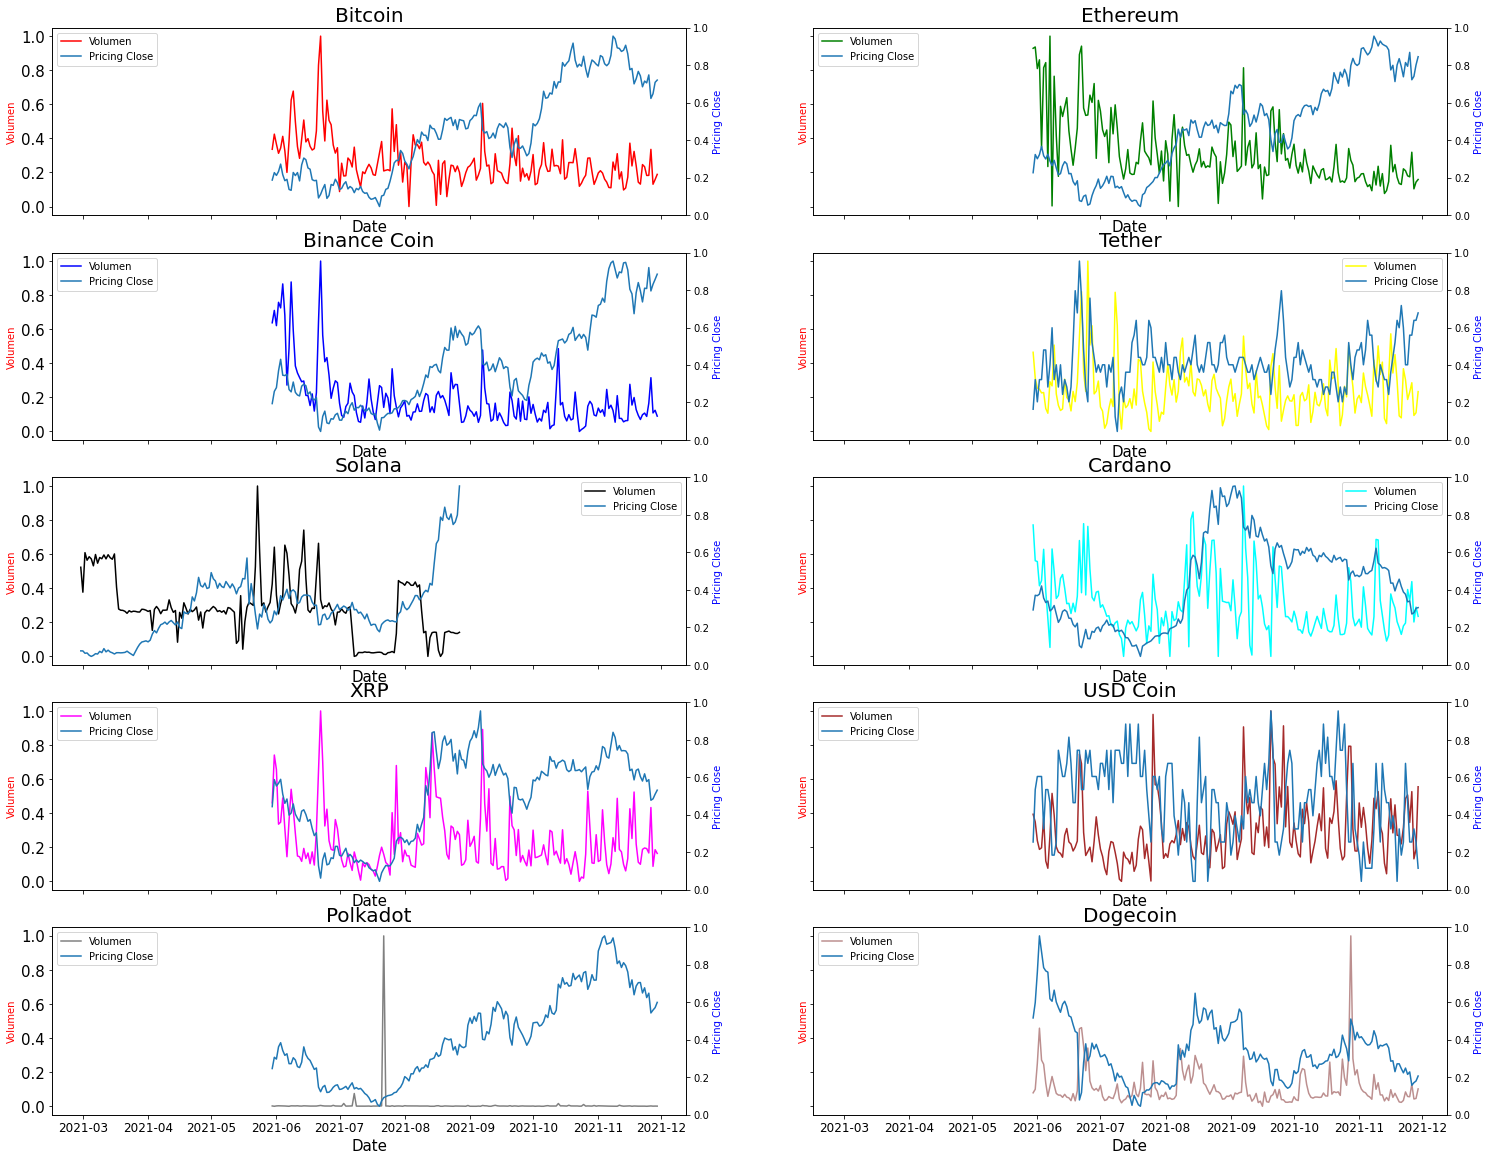

In [19]:
colors=['red','green','blue','yellow','black','cyan','magenta','brown','gray','rosybrown'
        ,'salmon','peachpuff','orange','gold','olive','lime','steelblue','pink','indigo']
COLUMNS = 2
ROWS = math.ceil(10/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(25, 20), sharey=True, sharex=True)
std_scaler = StandardScaler()

for index,element in enumerate(filtered_top10, start=0):
    
    current_column = index%COLUMNS
    current_row = index//COLUMNS
    
    ax = axs[current_row, current_column]
    ax.plot(element['Date'], (element['Volume'] - element['Volume'].min()) / (element['Volume'].max() - element['Volume'].min()),color=colors[index],label="Volumen")
    ax.plot(element['Date'], (element['Close'] - element['Close'].min()) / (element['Close'].max() - element['Close'].min()),label="Pricing Close")
    ax2 = ax.twinx()
    ax.set_ylabel('Volumen',color='red')
    ax2.set_ylabel('Pricing Close',color='blue')
    ax.set_xlabel('Date', size=15)
    ax.set_title(leaderboardnames[index], fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.legend()

In [20]:
top10_2021 = list()
semester = relativedelta(months=12)
for index,element in enumerate(top_10, start=0):
    element['Date'] = pd.to_datetime(element['Date'])
    filtered_df = element.loc[element['Date'].dt.year == 2021]
    top10_2021.append(filtered_df)

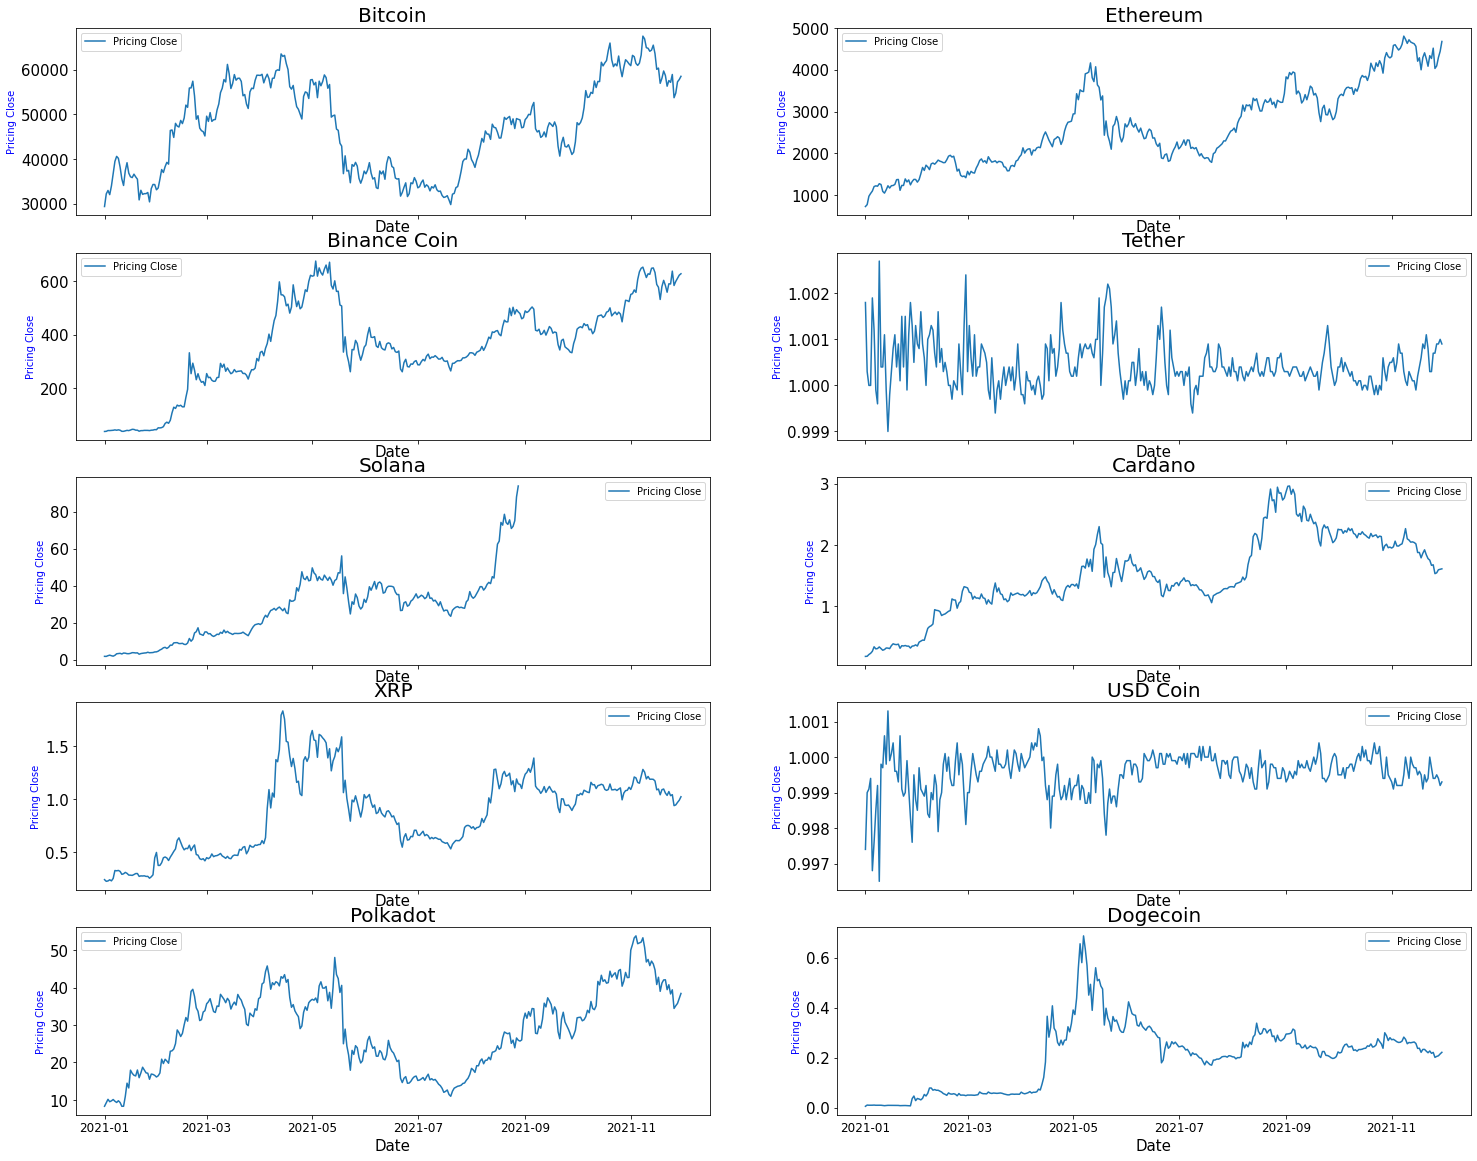

In [21]:
colors=['red','green','blue','yellow','black','cyan','magenta','brown','gray','rosybrown'
        ,'salmon','peachpuff','orange','gold','olive','lime','steelblue','pink','indigo']
COLUMNS = 2
ROWS = math.ceil(10/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(25, 20), sharey=False, sharex=True)
std_scaler = StandardScaler()
for index,element in enumerate(top10_2021, start=0):
    
    current_column = index%COLUMNS
    current_row = index//COLUMNS
    
    ax = axs[current_row, current_column]
    ax.plot(element['Date'], element['Close'],label="Pricing Close")
    ax.set_ylabel('Pricing Close',color='blue')
    ax.set_xlabel('Date', size=15)
    ax.set_title(leaderboardnames[index], fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=15)
    ax.legend()

In [40]:
from math import pi
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Span

fall_dates=[]
index = 1
element = top10_2021[index]

inc = element.Close > element.Open
dec = element.Open > element.Close
w = 12*60*60*1000 


p = figure(x_axis_type="datetime", plot_width=1000,title = leaderboardnames[index])
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(element.Date, element.High, element.Date, element.Low, color="black")
p.vbar(element.Date[inc], w, element.Open[inc], element.Close[inc], fill_color="#00FF00", line_color="black")
p.vbar(element.Date[dec], w, element.Open[dec], element.Close[dec], fill_color="#F2583E", line_color="black")
try:
    [fall_dates.append(element['Date'][ind+1])for ind in element.index if element['Close'][ind+1]<= element['Close'][ind]-element['Close'][ind]*0.15 ]
except:
    pass
vline = [Span(location=_date, dimension='height', line_color='red', line_width=2) for _date in fall_dates]
p.renderers.extend(vline)

output_notebook()
show(p)


Loading BokehJS ...

Analisamos la caida del precio de Ethereum del mas del 15% teniendo esta bajada en las fechas de:
 21-06-2021  
 19-05-2021
 21-01-2021

In [45]:
all_dates=[]
index = 0
element = top10_2021[index]

inc = element.Close > element.Open
dec = element.Open > element.Close
w = 12*60*60*1000 
fall_dates = []

p = figure(x_axis_type="datetime", plot_width=1000,title = leaderboardnames[index])
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(element.Date, element.High, element.Date, element.Low, color="black")
p.vbar(element.Date[inc], w, element.Open[inc], element.Close[inc], fill_color="#00FF00", line_color="black")
p.vbar(element.Date[dec], w, element.Open[dec], element.Close[dec], fill_color="#F2583E", line_color="black")
try:
    [fall_dates.append(element['Date'][ind+1])for ind in element.index if element['Close'][ind+1]<= element['Close'][ind]-element['Close'][ind]*0.12 ]
except:
    pass
vline = [Span(location=_date, dimension='height', line_color='red', line_width=2) for _date in fall_dates]
p.renderers.extend(vline)

output_notebook()
show(p)

Loading BokehJS ...

In [ ]:
Analisamos la caida del precio de Bitcoin del mas del 12% teniendo esta bajada en las fechas de:
 21-01-2021  
 12-05-2021
 19-05-2021

**19-05-2021:** 

China - Las criptomonedas "no son verdaderas divisas", consideraron el miércoles varias federaciones bancarias chinas de referencia, advirtiendo del peligro de la "especulación".

In [23]:
bitcoin = top10_2021[0]
print(bitcoin.iloc[0].Name)
print(bitcoin.index.values[-1])
for ind in bitcoin.index:
    # print('i',bitcoin['Close'][ind])
    if ind == bitcoin.index.values[-10]:
        break;
    elif bitcoin['Close'][ind+1]<= bitcoin['Close'][ind]-bitcoin['Close'][ind]*0.3:
        print('Fecha actual',bitcoin['Date'][ind],'con precio',bitcoin['Close'][ind],'Fecha posterior ',bitcoin['Date'][ind+1],'cayo a ',bitcoin['Close'][ind+1])

bitcoin
4153
